In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
path = '/Users/thainam/Documents/GitHub/COVID19_VN_MOH_MLmodels/GPS-model-sample/events_250k.csv'
data = pd.read_csv(path)

data

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude
0,1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
1,2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
2,3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
3,4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
4,6,7,5990807147117726237,2016-05-01 00:15:13,113.73,23.00
...,...,...,...,...,...,...
249995,369338,369339,-7683978150618390285,2016-05-05 23:09:37,114.21,30.67
249996,369339,369340,-7387945516430081335,2016-05-05 23:48:34,113.44,34.67
249997,369340,369341,-3969281659360747781,2016-05-05 23:45:51,122.99,41.12
249998,369342,369343,-189903359027977027,2016-05-05 23:21:54,116.29,23.29


In [19]:
merge = data.sort_values(by=['device_id', 'timestamp'])
merge

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude
155058,229086,229087,-9222956879900151005,2016-05-06 15:33:50,113.24,23.19
155045,229068,229069,-9222956879900151005,2016-05-06 15:34:19,113.24,23.19
139136,205470,205471,-9222956879900151005,2016-05-06 15:36:46,113.24,23.19
143336,211710,211711,-9222956879900151005,2016-05-06 21:26:14,113.24,23.19
196024,289563,289564,-9222956879900151005,2016-05-06 21:26:44,113.24,23.19
...,...,...,...,...,...,...
245977,363273,363274,9221586026451102237,2016-05-05 21:30:01,104.23,31.33
79247,117149,117150,9221586026451102237,2016-05-05 21:40:57,104.23,31.33
109925,162241,162242,9221586026451102237,2016-05-05 21:41:20,104.23,31.33
36006,53197,53198,9222355582733155698,2016-05-02 18:43:08,116.42,39.78


In [20]:
merge.to_csv('/Users/thainam/Documents/GitHub/COVID19_VN_MOH_MLmodels/GPS-model-sample/sorted.csv', index=False)

In [23]:
timestamp = merge.iloc[:, 3:4].values
timestamp

array([['2016-05-06 15:33:50'],
       ['2016-05-06 15:34:19'],
       ['2016-05-06 15:36:46'],
       ...,
       ['2016-05-05 21:41:20'],
       ['2016-05-02 18:43:08'],
       ['2016-05-02 18:44:50']], dtype=object)

In [25]:
device_id = merge.iloc[:, 2:3].values
device_id

array([[-9222956879900151005],
       [-9222956879900151005],
       [-9222956879900151005],
       ...,
       [ 9221586026451102237],
       [ 9222355582733155698],
       [ 9222355582733155698]])

In [36]:
latitude = merge.iloc[:, 5:6].values #y
latitude = np.reshape(latitute, len(latitute)).tolist()

In [28]:
longitude = merge.iloc[:, 4:5].values #x
longitude = np.reshape(longitude, len(longtitude))

array([[113.24],
       [113.24],
       [113.24],
       ...,
       [104.23],
       [116.42],
       [116.42]])

In [40]:
import math

distance_arr = []
for i in range(1, len(latitude)):
    distance = math.sqrt(pow(longitude[i - 1] - longitude[i], 2) + pow(latitude[i - 1] - latitude[i], 2))
    distance_arr.append(distance)


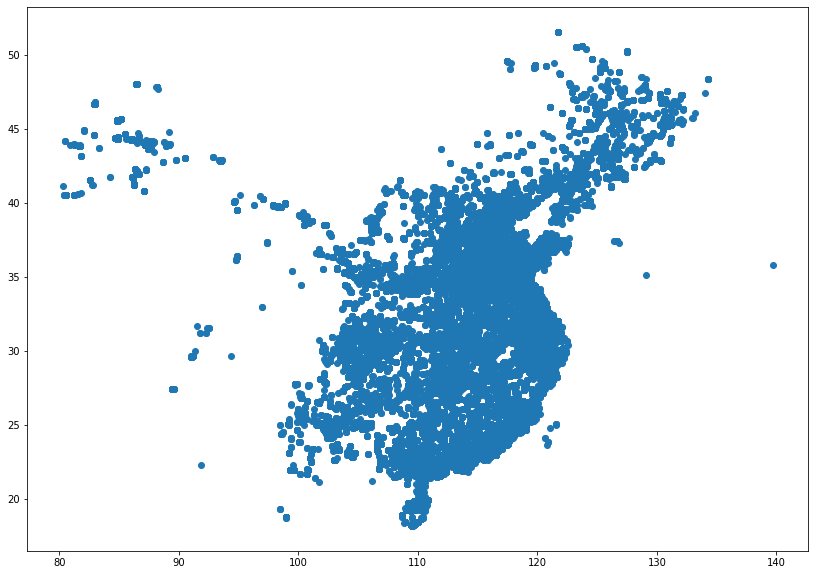

In [44]:
plt.figure(figsize=(14,10))
plt.scatter(longitude, latitude)

In [56]:
arr = [0.0]
for i in range (1, len(latitude)):
    if device_id[i - 1] == device_id[i]:
        distance = math.sqrt(pow(longitude[i] - longitude[i - 1], 2) + pow(latitude[i] - latitude[i - 1], 2))
        arr.append(distance)
    elif device_id[i - 1] != device_id[i]:
        arr.append(None)
    else:
        continue
    
print(np.array(arr))

[0.0 0.0 0.0 ... 0.0 None 0.0]


In [73]:
arr = np.array(arr)
arr = np.reshape(arr, (len(arr), 1))
merge = np.concatenate((merge, np.array(arr)), axis=1)
merge = pd.DataFrame(data=merge)
merge.head()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 249998 and the array at index 1 has size 250000